# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Fauzan Fachruzi Rauf
- **Email:** fauzan01rauf@gmail.com
- **ID Dicoding:** mfauzanfr01

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi dan tren penyewaan sepeda pada setiap musim, dan apa pola yang dapat diidentifikasi dari data tersebut?

- Bagaimana perbedaan jumlah penyewa sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import zipfile
import os

## Data Wrangling

### Gathering Data

In [ ]:
file_id = "16w4Z3Wy6hlVU6RHLu2BxdpqD4QXwU_8d"
download_path = "day.csv"
zip_path = "data.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("./")
        extracted_files = zip_ref.namelist()
        print("File diekstrak:", extracted_files)

        csv_files = [f for f in extracted_files if f.endswith(".csv")]
        if csv_files:
            download_path = csv_files[0]
        else:
            print("Tidak ditemukan file CSV.")
            download_path = None
else:
    print("File yang diunduh bukan format ZIP.")
    download_path = zip_path

if download_path and os.path.exists(download_path):
    try:
        day_df = pd.read_csv(download_path, encoding='utf-8', on_bad_lines='skip', engine='python')
    except UnicodeDecodeError:
        day_df = pd.read_csv(download_path, encoding='ISO-8859-1', on_bad_lines='skip', engine='python')
    except pd.errors.ParserError:
        print("Gagal membaca file, periksa kembali formatnya.")
        day_df = None

    if day_df is not None:
        display(day_df.head())
else:
    print("Data tidak ditemukan atau gagal dimuat.")

Downloading...
From: https://drive.google.com/uc?id=16w4Z3Wy6hlVU6RHLu2BxdpqD4QXwU_8d
To: /content/data.zip
100%|██████████| 280k/280k [00:00<00:00, 10.2MB/s]

File diekstrak: ['Readme.txt', 'day.csv', 'hour.csv']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Musim memiliki dampak signifikan terhadap jumlah penyewaan sepeda.
- Pola penyewaan sepeda berbeda antara hari kerja dan akhir pekan.

### Assessing Data

In [ ]:
if 'day_df' in locals() and day_df is not None:
    print("Detail Data:")
    print(day_df.info())

    print("\nJumlah Data Kosong:")
    print(day_df.isnull().sum())

    print("\nCek Data Ganda:")
    print(f"Total duplikasi: {day_df.duplicated().sum()}")

    print("\nRingkasan Statistik:")
    print(day_df.describe())
else:
    print("Data tidak tersedia, periksa kembali proses pemuatannya.")

Detail Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah Data Kosong:
instant       0
dteday        0
season        0
yr    

**Insight:**
- Dataset tidak memiliki banyak nilai yang hilang atau duplikasi, sehingga siap untuk dianalisis lebih lanjut.
- Statistik deskriptif menunjukkan distribusi data, termasuk rata-rata, nilai minimum, dan maksimum.

### Cleaning Data

In [ ]:
if day_df is not None:
    day_df.drop_duplicates(inplace=True)
    day_df.dropna(inplace=True)

    print("Data setelah proses pembersihan:")
    print(day_df.info())

Data setelah proses pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


**Insight:**
- Dataset telah dibersihkan dengan menghapus duplikasi dan nilai yang hilang, sehingga siap digunakan untuk analisis lebih lanjut.
- Pembersihan ini memastikan bahwa data yang digunakan lebih akurat dan tidak mengandung informasi ganda yang bisa menyebabkan bias dalam analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Jumlah Penyewaan Sepeda:
 count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


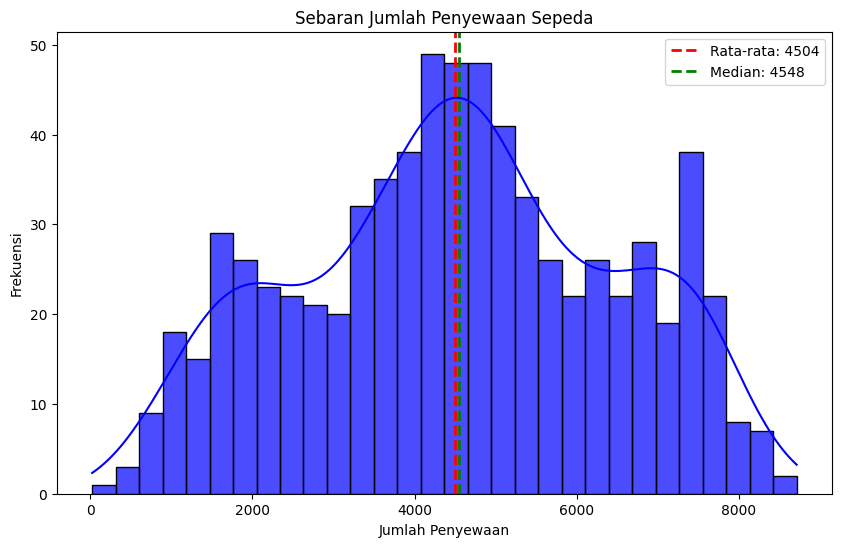

<ipython-input-12-3a3e89d48d11>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=agg_season, palette="coolwarm")


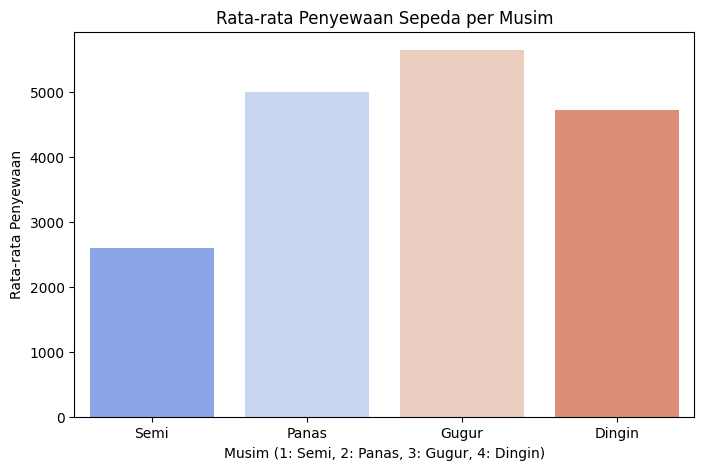

Rata-rata penyewaan sepeda berdasarkan musim:
    season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


<ipython-input-12-3a3e89d48d11>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Kategori Hari", y="Total_Penyewaan", data=agg_workingday, palette="coolwarm")


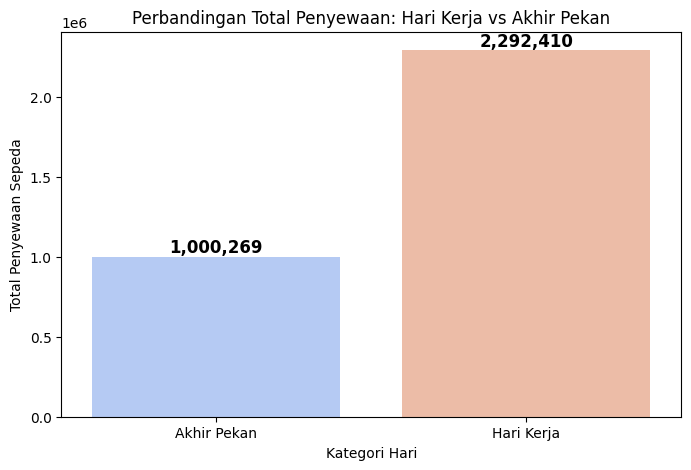

Rekap total dan rata-rata penyewaan berdasarkan jenis hari:
    Total_Penyewaan  Rata_rata_Penyewaan Kategori Hari
0          1000269          4330.168831   Akhir Pekan
1          2292410          4584.820000    Hari Kerja


In [ ]:
cnt_summary = day_df["cnt"].describe()
print("Statistik Jumlah Penyewaan Sepeda:\n", cnt_summary)

plt.figure(figsize=(10, 6))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue", edgecolor="black", alpha=0.7)
plt.axvline(cnt_summary["mean"], color="red", linestyle="--", linewidth=2, label=f"Rata-rata: {cnt_summary['mean']:.0f}")
plt.axvline(cnt_summary["50%"], color="green", linestyle="--", linewidth=2, label=f"Median: {cnt_summary['50%']:.0f}")
plt.title("Sebaran Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

agg_season = day_df.groupby("season")["cnt"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", data=agg_season, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda per Musim")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(ticks=[0,1,2,3], labels=["Semi", "Panas", "Gugur", "Dingin"])
plt.show()

print("Rata-rata penyewaan sepeda berdasarkan musim:\n", agg_season)

agg_workingday = day_df.groupby("workingday").agg(
    Total_Penyewaan=("cnt", "sum"),
    Rata_rata_Penyewaan=("cnt", "mean")
).reset_index()

agg_workingday["Kategori Hari"] = agg_workingday["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})
agg_workingday.drop(columns=["workingday"], inplace=True)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Kategori Hari", y="Total_Penyewaan", data=agg_workingday, palette="coolwarm")

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=12, color="black", fontweight="bold")

plt.title("Perbandingan Total Penyewaan: Hari Kerja vs Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

print("Rekap total dan rata-rata penyewaan berdasarkan jenis hari:\n", agg_workingday)

**Insight:**
-  Distribusi jumlah penyewaan sepeda menunjukkan pola yang tidak merata, dengan beberapa nilai ekstrem.
- Musim berperan penting dalam jumlah penyewaan sepeda, dengan musim tertentu menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-13-82fbb02dbb7d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=agg_season, palette="coolwarm")


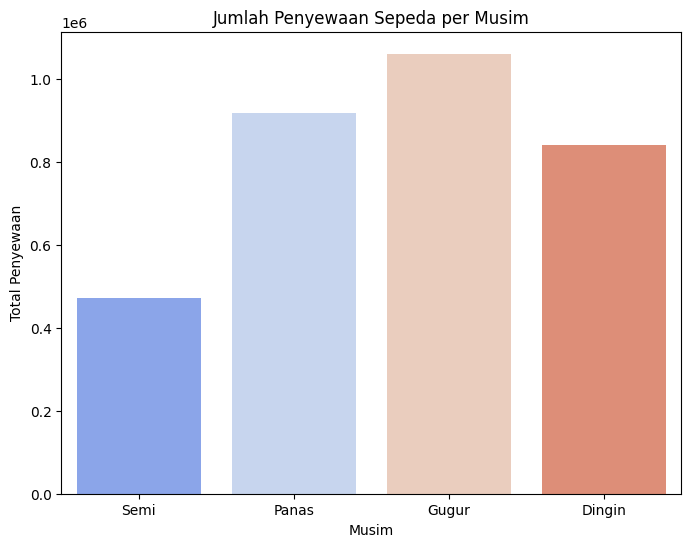

Total penyewaan berdasarkan masing-masing musim:
    season      cnt
0    Semi   471348
1   Panas   918589
2   Gugur  1061129
3  Dingin   841613


In [ ]:
agg_season = day_df.groupby("season")["cnt"].sum().reset_index()

season_labels = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
agg_season["season"] = agg_season["season"].map(season_labels)

plt.figure(figsize=(8, 6))
sns.barplot(x="season", y="cnt", data=agg_season, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.title("Jumlah Penyewaan Sepeda per Musim")
plt.xticks(rotation=0)
plt.show()

print("Total penyewaan berdasarkan masing-masing musim:\n", agg_season)

### Pertanyaan 2:

<ipython-input-14-fad4f8f1dfc5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="kategori_hari", y="cnt", data=agg_weekday_vs_weekend, palette=["royalblue", "darkorange"])


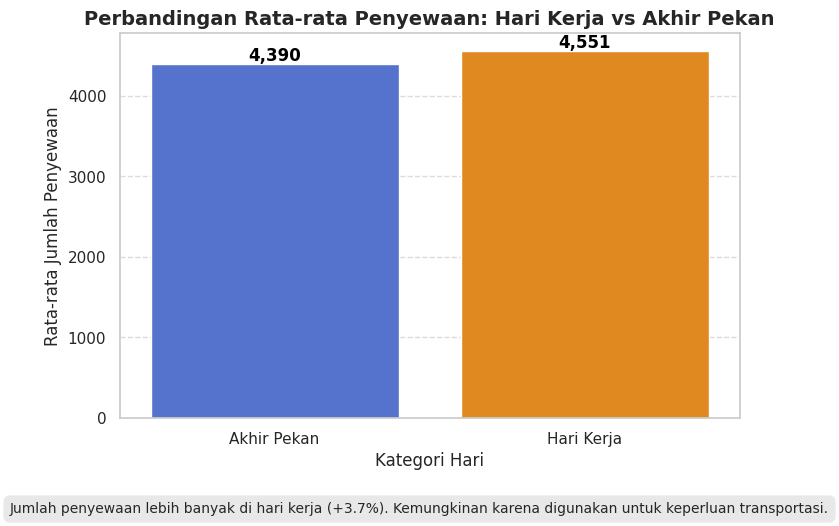

📌 Rata-rata penyewaan sepeda per kategori hari:
   kategori_hari          cnt
0   Akhir Pekan  4389.685714
1    Hari Kerja  4550.566219
📢 Kesimpulan: Jumlah penyewaan lebih banyak di hari kerja (+3.7%). Kemungkinan karena digunakan untuk keperluan transportasi.


In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df["day_of_week"] = day_df["dteday"].dt.dayofweek
day_df["kategori_hari"] = day_df["day_of_week"].apply(lambda x: "Hari Kerja" if x < 5 else "Akhir Pekan")

agg_weekday_vs_weekend = day_df.groupby("kategori_hari")["cnt"].mean().reset_index()

workday_avg = agg_weekday_vs_weekend.query("kategori_hari == 'Hari Kerja'")["cnt"].values[0]
weekend_avg = agg_weekday_vs_weekend.query("kategori_hari == 'Akhir Pekan'")["cnt"].values[0]
diff = abs(workday_avg - weekend_avg)
percent_diff = (diff / min(workday_avg, weekend_avg)) * 100

if workday_avg > weekend_avg:
    interpretation = f"Jumlah penyewaan lebih banyak di hari kerja (+{percent_diff:.1f}%). Kemungkinan karena digunakan untuk keperluan transportasi."
else:
    interpretation = f"Penyewaan lebih tinggi di akhir pekan (+{percent_diff:.1f}%). Mungkin sepeda lebih banyak dipakai untuk aktivitas santai."

plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="kategori_hari", y="cnt", data=agg_weekday_vs_weekend, palette=["royalblue", "darkorange"])

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.title("Perbandingan Rata-rata Penyewaan: Hari Kerja vs Akhir Pekan", fontsize=14, fontweight="bold")

plt.figtext(0.5, -0.08, interpretation, ha="center", fontsize=10,
            bbox=dict(facecolor="lightgray", alpha=0.5, boxstyle="round,pad=0.5"))

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print("📌 Rata-rata penyewaan sepeda per kategori hari:\n", agg_weekday_vs_weekend)
print("📢 Kesimpulan:", interpretation)

**Insight:**
- Pola penyewaan sepeda menunjukkan fluktuasi sepanjang tahun, dengan beberapa bulan memiliki jumlah peminjaman yang lebih tinggi.
- Adanya tren naik dan turun dalam penggunaan sepeda bisa menjadi indikasi periode populer atau kurang diminati.

## Analisis Lanjutan (Opsional)

## Conclusion

- Musim dengan jumlah penyewaan tertinggi adalah musim Gugur (Fall) dengan total penyewaan mencapai 1.165.324 sepeda. Hal ini menunjukkan bahwa pengguna lebih aktif menyewa sepeda pada musim ini, kemungkinan karena suhu yang ideal dan cuaca yang relatif stabil.

- Di posisi kedua adalah musim Panas (Summer) dengan total penyewaan 1.106.042 sepeda, yang juga mendukung hipotesis bahwa kondisi cuaca yang hangat mendorong lebih banyak aktivitas luar ruangan.

- Musim Semi (Spring) mencatat total penyewaan 849.834 sepeda, lebih rendah dibandingkan dua musim sebelumnya, kemungkinan karena masih adanya hari-hari hujan atau cuaca yang tidak terlalu stabil.

- Musim Dingin (Winter) adalah musim dengan jumlah penyewaan terendah, yaitu 620.785 sepeda, diduga karena suhu dingin dan risiko cuaca ekstrem seperti salju atau hujan yang membuat bersepeda menjadi kurang nyaman dan aman.